## ${\textbf{Libraries}}$

In [76]:
import numpy as np
import pandas as pd
import scipy
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## ${\textbf{Import Data}}$

In [77]:
df_segmentation = pd.read_csv('segmentation_data.csv', index_col = 0)

## ${\textbf{EDA and Data Preparation}}$

In [78]:
print(df_segmentation.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [79]:
# Creating a dictionary for renaming columns for better understanding

rename_dict = {
    'ID': 'customer_id',
    'Year_Birth': 'birth_year',
    'Education': 'education_level',
    'Marital_Status': 'marital_status',
    'Income': 'annual_income',
    'Kidhome': 'children_at_home',
    'Teenhome': 'teens_at_home',
    'Dt_Customer': 'enrollment_date',
    'Recency': 'days_since_last_purchase',
    'Complain': 'complained_last_2_years',
    'MntWines': 'amount_spent_wines_2yrs',
    'MntFruits': 'amount_spent_fruits_2yrs',
    'MntMeatProducts': 'amount_spent_meat_2yrs',
    'MntFishProducts': 'amount_spent_fish_2yrs',
    'MntSweetProducts': 'amount_spent_sweets_2yrs',
    'MntGoldProds': 'amount_spent_gold_2yrs',
    'NumDealsPurchases': 'num_purchases_with_discount',
    'AcceptedCmp1': 'accepted_offer_1',
    'AcceptedCmp2': 'accepted_offer_2',
    'AcceptedCmp3': 'accepted_offer_3',
    'AcceptedCmp4': 'accepted_offer_4',
    'AcceptedCmp5': 'accepted_offer_5',
    'Response': 'accepted_last_offer',
    'NumWebPurchases': 'num_web_purchases',
    'NumCatalogPurchases': 'num_catalog_purchases',
    'NumStorePurchases': 'num_store_purchases',
    'NumWebVisitsMonth': 'monthly_web_visits',
    'Z_CostContact': 'contact_cost',  
    'Z_Revenue': 'revenue' 
}

df_segmentation.rename(columns=rename_dict, inplace=True)

print(df_segmentation.columns)

Index(['birth_year', 'education_level', 'marital_status', 'annual_income',
       'children_at_home', 'teens_at_home', 'enrollment_date',
       'days_since_last_purchase', 'amount_spent_wines_2yrs',
       'amount_spent_fruits_2yrs', 'amount_spent_meat_2yrs',
       'amount_spent_fish_2yrs', 'amount_spent_sweets_2yrs',
       'amount_spent_gold_2yrs', 'num_purchases_with_discount',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'monthly_web_visits', 'accepted_offer_3', 'accepted_offer_4',
       'accepted_offer_5', 'accepted_offer_1', 'accepted_offer_2',
       'complained_last_2_years', 'contact_cost', 'revenue',
       'accepted_last_offer'],
      dtype='object')


In [80]:
# Displaying all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_segmentation

,birth_year,education_level,marital_status,annual_income,children_at_home,teens_at_home,enrollment_date,days_since_last_purchase,amount_spent_wines_2yrs,amount_spent_fruits_2yrs,amount_spent_meat_2yrs,amount_spent_fish_2yrs,amount_spent_sweets_2yrs,amount_spent_gold_2yrs,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,accepted_offer_3,accepted_offer_4,accepted_offer_5,accepted_offer_1,accepted_offer_2,complained_last_2_years,contact_cost,revenue,accepted_last_offer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0


In [81]:
# Check for duplicates 
duplicates = df_segmentation.duplicated()
duplicate_rows = df_segmentation[df_segmentation.duplicated(keep=False)]
duplicate_rows


,birth_year,education_level,marital_status,annual_income,children_at_home,teens_at_home,enrollment_date,days_since_last_purchase,amount_spent_wines_2yrs,amount_spent_fruits_2yrs,amount_spent_meat_2yrs,amount_spent_fish_2yrs,amount_spent_sweets_2yrs,amount_spent_gold_2yrs,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,accepted_offer_3,accepted_offer_4,accepted_offer_5,accepted_offer_1,accepted_offer_2,complained_last_2_years,contact_cost,revenue,accepted_last_offer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2114,1946,PhD,Single,82800.0,0,0,24/11/2012,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
4939,1946,Graduation,Together,37760.0,0,0,31/08/2012,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
4047,1954,PhD,Married,65324.0,0,1,11/01/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,3,11,0
1409,1951,Graduation,Together,40689.0,0,1,18/03/2013,69,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,3,11,0
1966,1965,PhD,Married,84618.0,0,0,22/11/2013,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,1,0,19/06/2013,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,3,11,0
7366,1982,Master,Single,75777.0,0,0,04/07/2013,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1
4749,1968,Graduation,Together,58554.0,1,1,26/09/2012,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,3,11,0


In [82]:
# Drop duplicates
df_segmentation = df_segmentation.drop_duplicates()

In [83]:
# Now I'm checking for Null Values and dtypes
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   birth_year                   2058 non-null   int64  
 1   education_level              2058 non-null   object 
 2   marital_status               2058 non-null   object 
 3   annual_income                2034 non-null   float64
 4   children_at_home             2058 non-null   int64  
 5   teens_at_home                2058 non-null   int64  
 6   enrollment_date              2058 non-null   object 
 7   days_since_last_purchase     2058 non-null   int64  
 8   amount_spent_wines_2yrs      2058 non-null   int64  
 9   amount_spent_fruits_2yrs     2058 non-null   int64  
 10  amount_spent_meat_2yrs       2058 non-null   int64  
 11  amount_spent_fish_2yrs       2058 non-null   int64  
 12  amount_spent_sweets_2yrs     2058 non-null   int64  
 13  amount_spent_gold_2y

In [84]:
## Changing dtypes, dropping missing values, adding and dropping columns:

from datetime import datetime

# There are 24 missing values in the "annual_income" colum, which I'm going to drop.
df_segmentation = df_segmentation.dropna(subset=['annual_income'])

# Converting date-related columns to pandas datetime format
# is generally a good practice so I'm going to convert the "enrollment_data" column.

df_segmentation['enrollment_date'] = pd.to_datetime(df_segmentation['enrollment_date'], format='%d/%m/%Y')

# Calculating and adding a "age" colum and dropping 'birth_year'
current_year = datetime.now().year
df_segmentation['age'] = current_year - df_segmentation['birth_year']

df_segmentation = df_segmentation.drop(columns=['birth_year'])

In [85]:
# Further exploration 
df_segmentation.describe()

,annual_income,children_at_home,teens_at_home,enrollment_date,days_since_last_purchase,amount_spent_wines_2yrs,amount_spent_fruits_2yrs,amount_spent_meat_2yrs,amount_spent_fish_2yrs,amount_spent_sweets_2yrs,amount_spent_gold_2yrs,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,accepted_offer_3,accepted_offer_4,accepted_offer_5,accepted_offer_1,accepted_offer_2,complained_last_2_years,contact_cost,revenue,accepted_last_offer,age
count,2034.000000,2034.000000,2034.000000,2034,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.0,2034.0,2034.000000,2034.000000
mean,52357.791544,0.442970,0.508358,2013-07-11 14:44:57.345132544,48.844641,305.180924,26.292527,167.763520,37.449361,27.141101,43.809735,2.337758,4.099312,2.670600,5.782203,5.322517,0.074238,0.076205,0.072271,0.065388,0.012783,0.009833,3.0,11.0,0.153392,55.197148
min,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,35528.250000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,51533.000000,0.000000,0.000000,2013-07-12 12:00:00,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,68480.750000,1.000000,1.000000,2014-01-02 00:00:00,74.000000,505.000000,33.000000,230.000000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000
std,25526.956988,0.535914,0.546130,NaN,28.983678,337.323274,39.772885,226.790697,54.792015,41.494430,51.741969,1.933849,2.756911,2.937896,3.238853,2.438665,0.262222,0.265390,0.259000,0.247271,0.112363,0.098696,0.0,0.0,0.360454,11.975420


In [86]:
# Based on the data summary, several observations stand out that could be
# considered unusual or noteworthy: 

## Extreme values in annual income:
# The maximum annual income reported is $666,666, which is significantly higher 
# than the mean ($52.357,79) and suggests the presence of outliers or potentially 
# erroneous data entries. The minimum annual income reported is $1730. 

## Uniform data for contact cost and revenue:
# The 'contact_cost' and 'revenue' columns show constant values (both have the same
# min, 25%, 50%, 75%, and max values), which could imply that these metrics are not
# varying across different customers or transactions.

## Low Engagement in Marketing Campaigns:
# Acceptance rates for the offers (accepted_offer_1 through accepted_offer_5) are 
# very low, with most being under 10%. This indicates a relatively low effectiveness 
# of the campaigns or potentially a highly selective customer base.

## Zero Complaints for Most Customers:
# The 'complained_last_2_years' column shows a max of 1 and a mean close to zero, 
# suggesting that complaints are very rare among these customers. 
# This could be a positive indicator of customer satisfaction. 

In [87]:
## Continuation: Changing dtypes, dropping missing values, adding and dropping columns:

# Given that both 'contact_cost' and 'revenue' show no variability, 
# I'm going to drop them. 

df_segmentation = df_segmentation.drop(columns=['contact_cost', 'revenue'])

# Currently, the following two variables are not display in the .describe() summary,
# because that information is stored as an object. Sociodemografics suchs as 
# education level and marital status can be crucial for proper segmentation. 
# Therefore, I have to use Label Encoding: 
# 1   education_level              2058 non-null   object 
# 2   marital_status               2058 non-null   object 

# Distribution of categories in 'education_level'
education_level_counts = df_segmentation['education_level'].value_counts()
print("Education Level Distribution:")
print(education_level_counts)

# Distribution of categories in 'marital_status'
marital_status_counts = df_segmentation['marital_status'].value_counts()
print("\nMarital Status Distribution:")
print(marital_status_counts)

Education Level Distribution:
education_level
Graduation    1019
PhD            445
Master         336
2n Cycle       185
Basic           49
Name: count, dtype: int64

Marital Status Distribution:
marital_status
Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [88]:
# Dictionary to replace old with new education levels
education_replacement = {
    'Basic': 'Lower Education',
    '2n Cycle': 'Lower Education',
    'Graduation': 'Graduation',
    'Master': 'Higher Education',
    'PhD': 'Higher Education'
}

# Applying replacement dictionary to education_level
df_segmentation['education_level'] = df_segmentation['education_level'].replace(education_replacement)

# Label encoding for education_level
education_encoding = {
    'Lower Education': 0,
    'Graduation': 1,
    'Higher Education': 2
}

df_segmentation['education_level'] = df_segmentation['education_level'].map(education_encoding)

# Verify the transformations
print("Unique education levels:", df_segmentation['education_level'].unique())
print("Education level distribution:", df_segmentation['education_level'].value_counts())

Unique education levels: [1 2 0]
Education level distribution: education_level
1    1019
2     781
0     234
Name: count, dtype: int64


In [ ]:
## Marital Status: Instead of using Label Encoding, One-Hot Encoding or the Grower Distance 
# to cluster on numerical as well as categorical data, I decided to go for a straightforward binary
# classification between "Singles" versus "Non-Single" (the rest).

# Drop the "others(Alone, Absurg, YOLO; 7 obeservatin in total)"
exclude_statuses = ['Alone', 'Absurd', 'YOLO']

# Filter out the rows
df_segmentation_cleaned = df_segmentation[~df_segmentation['marital_status'].isin(exclude_statuses)]

# Binary encoding: 0 (Single), 1 (Non-Single)
def binary_marital_status(status):
    return 0 if status == 'Single' else 1

# Apply the binary encoding function
df_segmentation_cleaned['marital_status_binary'] = df_segmentation_cleaned['marital_status'].apply(binary_marital_status)

# Drop the original marital_status column
df_segmentation_cleaned = df_segmentation_cleaned.drop(columns=['marital_status'])

df_segmentation = df_segmentation_cleaned

# Verify the transformations
print("Unique marital statuses:", df_segmentation_cleaned['marital_status_binary'].unique())
print("Marital status distribution:", df_segmentation_cleaned['marital_status_binary'].value_counts())


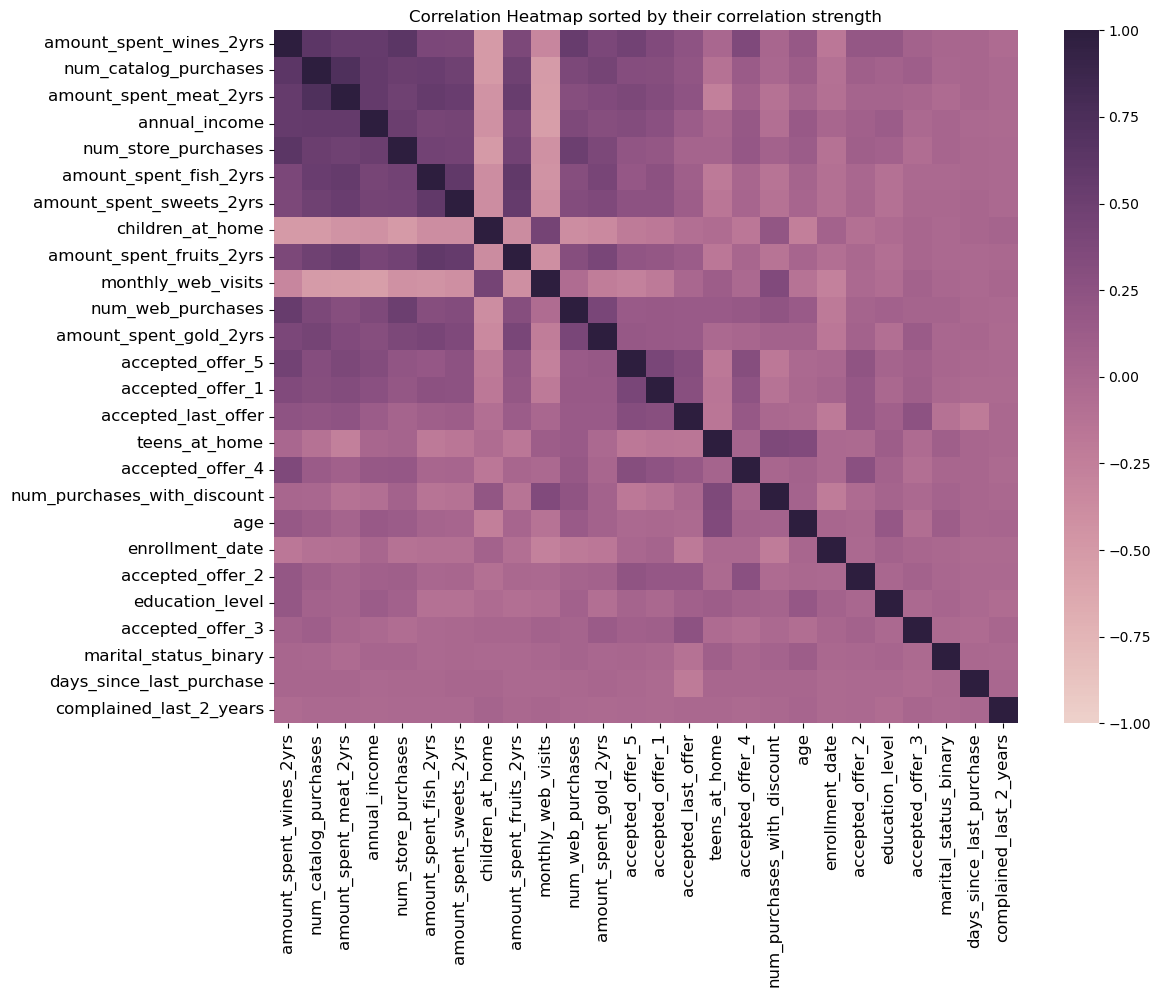

In [90]:
##  Using the Correlation Matrix  ## 

corr = df_segmentation.corr()

# 1. Identify Highly Correlated Features:
# Features with high absolute correlation (above 0.75 or another threshold) 
# with each other likely provide redundant information.

# 2. Drop One of the Correlated Features:
# If two or more features have a high correlation, 
# retain only one to avoid redundant data that can skew clustering results.

# 3. Aggregate Features with Domain Knowledge:
# Features that are naturally related, such as individual spending categories, 
# might be aggregated to provide a clearer picture (e.g., total expenditure).


# Create a mask to sort the DataFrame columns by their correlation strength
order = corr.abs().sum().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr = corr.loc[order, order]

# Create a cubehelix palette for the heatmap
cubehelix_cmap = sns.cubehelix_palette(as_cmap=True)

# Create the heatmap
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(
    sorted_corr,
    #annot=True,  # Annotate cells with correlation values
    cmap=cubehelix_cmap,  # Use cubehelix color palette
    vmin=-1, vmax=1,  # Set the color scale limits
    fmt=".2f"  # Format for the annotation text
)

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap sorted by their correlation strength')
plt.show()

In [91]:
## Aggregration 

## Children at home
# For general demographic analyses where detailed distinctions between children 
# and teens are unnecessary, a combined column might provide a clear picture of 
# family size and responsibilities, which could be useful for market segmentation.

# Summing 'children_at_home' and 'teens_at_home' into a new column 'children'
df_segmentation['children'] = df_segmentation['children_at_home'] + df_segmentation['teens_at_home']
# Dropping the original 'children_at_home' and 'teens_at_home' columns
df_segmentation.drop(['children_at_home', 'teens_at_home'], axis=1, inplace=True)


## Responsiveness to promotional offers
# Calculating the total engagement level of each customer with promotional campaigns.

# Summing all accepted offers into a new column 'accepted_discounts'
df_segmentation['accepted_discounts'] = df_segmentation[['accepted_offer_1', 'accepted_offer_2', 'accepted_offer_3', 'accepted_offer_4', 'accepted_offer_5', 'accepted_last_offer']].sum(axis=1)
# Dropping the original offer acceptance columns
df_segmentation.drop(['accepted_offer_1', 'accepted_offer_2', 'accepted_offer_3', 'accepted_offer_4', 'accepted_offer_5', 'accepted_last_offer'], axis=1, inplace=True)

# Essentially, how much the customer has spent over the last two year on 
# either meat or sth else, is telling us the same. So I've already created
# a total_expenditure column, meaning I'm going to drop the amount_spend columns now.
# I'm going to also add complained_last_2_years to this list, because the customers
# barely complained during that period. 

# List of columns to sum up
expenditure_columns = [
    'amount_spent_wines_2yrs',
    'amount_spent_fruits_2yrs',
    'amount_spent_meat_2yrs',
    'amount_spent_fish_2yrs',
    'amount_spent_sweets_2yrs',
    'amount_spent_gold_2yrs'
]

# Create a new column for total expenditure
df_segmentation['total_expenditure'] = df_segmentation[expenditure_columns].sum(axis=1)

# Storing the product preferences for later analysis
product_preferences = df_segmentation

df_segmentation = df_segmentation.drop(columns=['amount_spent_wines_2yrs', 'amount_spent_fruits_2yrs',
                          'amount_spent_meat_2yrs', 'amount_spent_fish_2yrs',
                          'amount_spent_sweets_2yrs','amount_spent_gold_2yrs', 
                          'complained_last_2_years', 'enrollment_date'
                          ])

In [92]:
df_segmentation.describe()

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,1.267390,52354.605821,48.913172,2.333498,4.095708,2.670449,5.783917,5.322151,55.213616,0.783424,0.951159,0.452886,607.760730
std,0.653442,25555.480816,28.984003,1.933821,2.754825,2.936466,3.242986,2.437636,11.970070,0.412013,0.745558,0.892065,604.049603
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,35482.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000,1.000000,0.000000,0.000000,69.000000
50%,1.000000,51537.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000,1.000000,1.000000,0.000000,396.000000
75%,2.000000,68557.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000,1.000000,1.000000,1.000000,1048.000000
max,2.000000,666666.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000,1.000000,3.000000,5.000000,2525.000000


In [93]:
## Removing outliers
# Calculate the 99th percentile for annual income
income_threshold = np.percentile(df_segmentation['annual_income'], 99)

# Define outlier conditions
age_outliers = df_segmentation['age'] > 100  
income_outliers = df_segmentation['annual_income'] > income_threshold

# Combine conditions
outliers = age_outliers | income_outliers  

# Drop rows where any of the conditions is True
df_segmentation_clean = df_segmentation[~outliers]

# Updating the main dataframe
df_segmentation = df_segmentation_clean

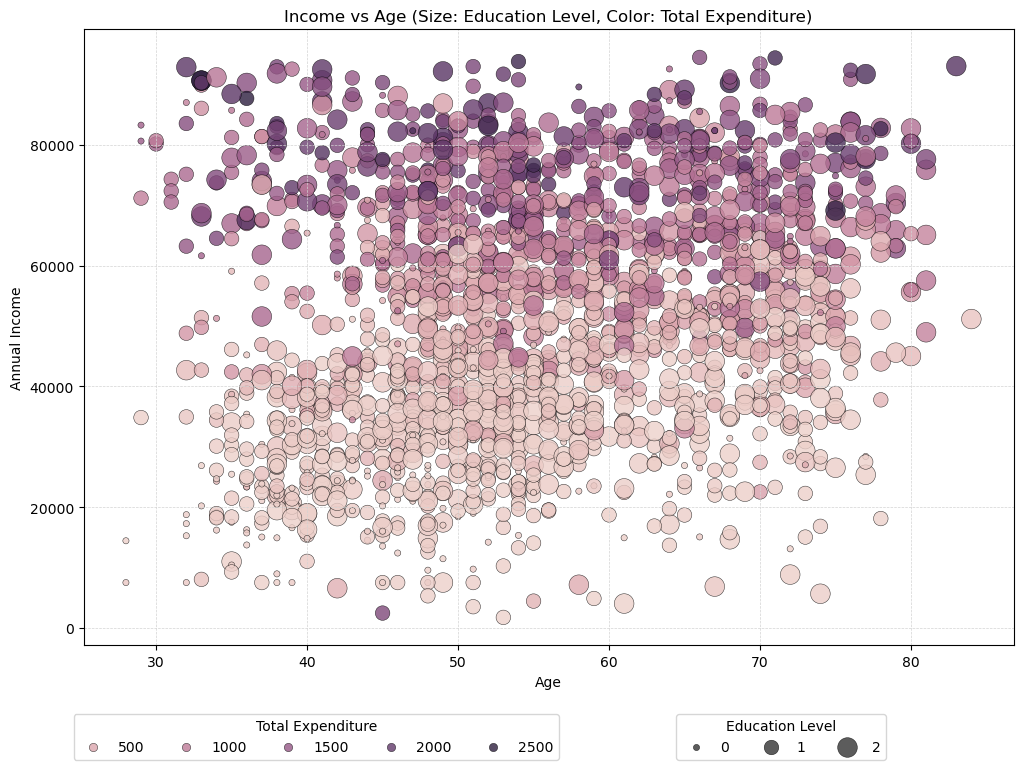

In [95]:
# Bubble chart visualizing the relationship between income, age, education level and total expenditure.

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='age',
    y='annual_income',
    size='education_level',  #
    hue='total_expenditure',      
    data=df_segmentation,
    sizes=(20, 200),            
    alpha=0.8,                  
    edgecolor='black'
)

plt.title('Income vs Age (Size: Education Level, Color: Total Expenditure)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')

# Get handles and labels for the legend
handles, labels = scatter.axes.get_legend_handles_labels()
size_handles = handles[1:6]  # Adjust these indices based on your legend items
size_labels = labels[1:6]
color_handles = handles[7:]  # Adjust these indices based on your legend items
color_labels = labels[7:]

# Create custom legends
legend1 = plt.legend(size_handles, size_labels, title='Total Expenditure', loc='upper center', bbox_to_anchor=(0.25, -0.1), ncol=5)
legend2 = plt.legend(color_handles, color_labels, title='Education Level', loc='upper center', bbox_to_anchor=(0.75, -0.1), ncol=3)

# Add the first legend manually
plt.gca().add_artist(legend1)

plt.show()


In [96]:
# Analysis based on the visualization:

# Axes and Labels:
# X-axis (Age): Represents the age of individuals, ranging from about 30 to 80 years.
# Y-axis (Annual Income): Represents the annual income of individuals, ranging from approximately $20,000 to over $80,000.

# Data Points:
# Size: The size of each point corresponds to the education level of the individual, with three categories represented: 0, 1, and 2.
#       The key does not specify what these levels exactly are (e.g., high school, bachelor's, master's).
# Color: The color intensity of the points represents the total expenditure. Lighter colors indicate lower expenditure,
#        while darker colors indicate higher expenditure. The expenditure values range from 500 to over 2500.

# Observations from the Plot:
# Income Distribution: Higher incomes are more frequent in the age range from 50 to 70. This group shows a wide range of expenditures
#                       but tends to have higher expenditure values.
# Education and Income: Higher education levels (larger points) are associated with higher incomes, particularly noticeable in the
#                       central to upper regions of the plot where darker, larger points are more prevalent.
# Age and Expenditure: Older individuals (60+) generally exhibit higher income levels with moderately high expenditure rates.
#                      Their education levels appear diverse.
# Younger Individuals: Those in the 30-40 age range tend to have smaller data points (indicating lower education levels),
#                      with generally lower income and expenditure levels.

# Possible Insights:
# Income Peak: There appears to be an income peak around middle age, potentially aligning with peak career stages.
# Education and Earnings: There is a visible trend that higher education may correlate with higher income and higher expenditure,
#                         suggesting an investment in lifestyle or necessities that scales with income.
# Economic Behavior by Age: The economic behavior (in terms of spending) changes with age, possibly indicating shifts in financial
#                           priorities or responsibilities (e.g., retirement planning, healthcare costs).

# This plot can be very insightful for understanding demographic economic behaviors, particularly how education impacts
# income and expenditure through different stages of life.


In [97]:
print(df_segmentation.columns)

Index(['education_level', 'annual_income', 'days_since_last_purchase',
       'num_purchases_with_discount', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'monthly_web_visits',
       'age', 'marital_status_binary', 'children', 'accepted_discounts',
       'total_expenditure'],
      dtype='object')


## ${\textbf{Standardization}}$

In [98]:
# First, I'm going to standardize the data so that all numerical features have comparable scales.
# This ensures consistent data preparation for clustering algorithms, which are sensitive to feature scaling, 
# and keeps the subsequent data processing steps uniform.

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only the numerical columns (int64 and float64)
numerical_cols = df_segmentation.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical data
scaled_data = pd.DataFrame(scaler.fit_transform(df_segmentation[numerical_cols]), 
                                      columns=numerical_cols, 
                                      index=df_segmentation.index)

# Check the scaled data
scaled_data.head()

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure
ID,,,,,,,,,,,,,
5524,-0.408380,0.331990,0.311860,0.348808,1.447023,2.655481,-0.556085,0.678168,1.018048,-1.906980,-1.287867,0.645435,1.694647
2174,-0.408380,-0.245696,-0.379246,-0.179681,-1.142144,-0.582284,-1.176780,-0.149350,1.275842,-1.906980,1.400614,-0.505773,-0.959915
4141,-0.408380,0.992015,-0.793909,-0.708171,1.447023,-0.222532,1.306002,-0.563108,0.330597,0.524389,-1.287867,-0.505773,0.290568
6182,-0.408380,-1.210532,-0.793909,-0.179681,-0.772263,-0.942036,-0.556085,0.264409,-1.302097,0.524389,0.056374,-0.505773,-0.916507
5324,1.123428,0.339582,1.555851,1.405788,0.337380,0.137219,0.064611,-0.149350,-1.044303,0.524389,0.056374,-0.505773,-0.300448


## ${\textbf{Hierarchical Clustering}}$

In [99]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(scaled_data, method = 'ward')

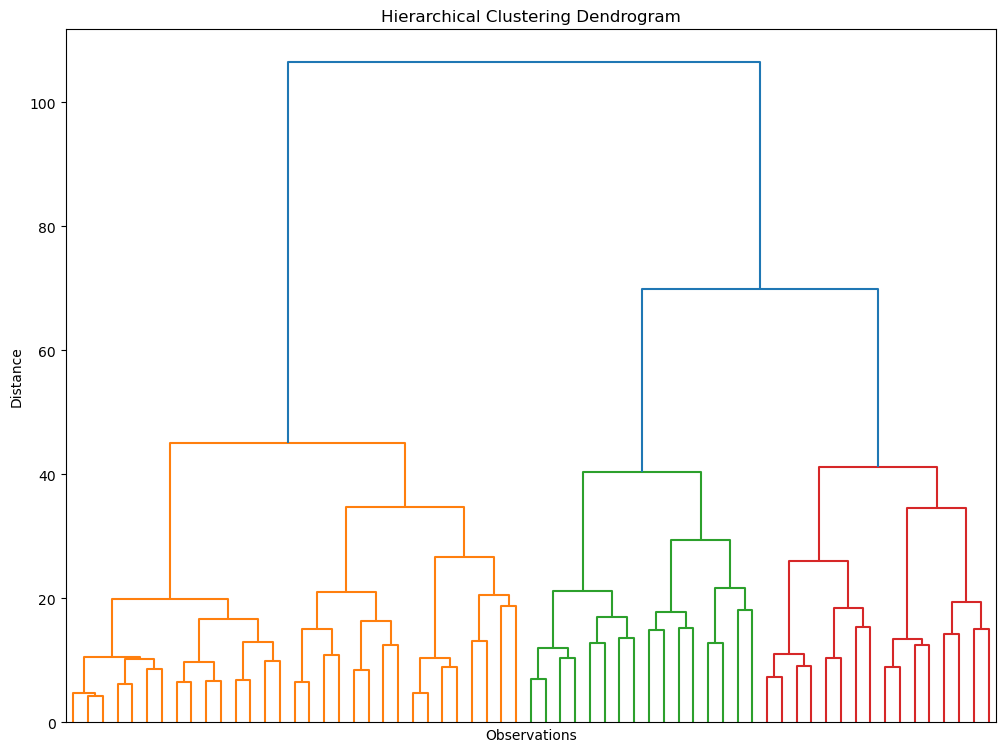

In [100]:
color_threshold_value = 50

plt.figure(figsize=(12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hier_clust,
    truncate_mode='level',
    p=5,
    show_leaf_counts=False,
    no_labels=True,
    color_threshold=color_threshold_value 
)

plt.show()


## ${\textbf{K-means Clustering}}$

In [ ]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

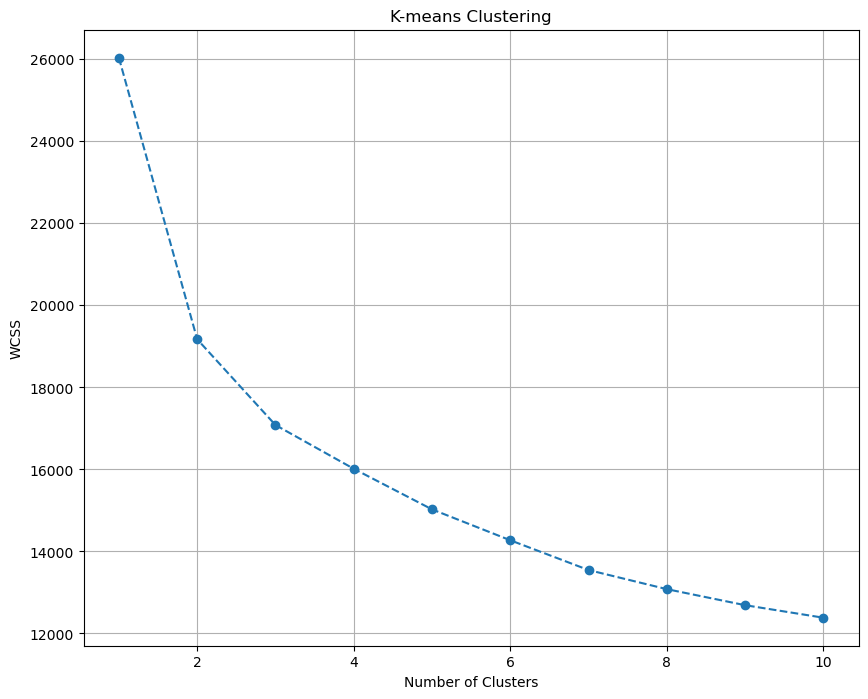

In [104]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.grid(True)
plt.show()

In [105]:
# We run K-means with a fixed number of clusters. In our case 3.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)

In [ ]:
# We divide our data into the 3 clusters.
kmeans.fit(scaled_data)

### ${\textbf{Results}}$

In [107]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [108]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure
Segment K-means,,,,,,,,,,,,,
0,1.173724,34290.144408,49.356135,1.986971,2.089034,0.551574,3.192182,6.452769,52.226927,0.760043,1.230185,0.180239,96.092291
1,1.308448,75265.683694,49.278978,1.147348,5.017682,5.889980,8.294695,2.842829,56.056974,0.746562,0.178782,1.035363,1367.139489
2,1.378709,57561.708551,48.092496,3.966841,6.474695,3.034904,7.746946,5.842932,59.052356,0.856894,1.212914,0.326353,735.338569


In [109]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','education_level']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,
0,1.173724,34290.144408,49.356135,1.986971,2.089034,0.551574,3.192182,6.452769,52.226927,0.760043,1.230185,0.180239,96.092291,921,0.459810
1,1.308448,75265.683694,49.278978,1.147348,5.017682,5.889980,8.294695,2.842829,56.056974,0.746562,0.178782,1.035363,1367.139489,509,0.254119
2,1.378709,57561.708551,48.092496,3.966841,6.474695,3.034904,7.746946,5.842932,59.052356,0.856894,1.212914,0.326353,735.338569,573,0.286071


In [110]:
# Explanation of the Segment Names Based on Mean Values

# Balanced Multi-Channel Shoppers
# Education Level: 1.17 (Moderate)
# Annual Income: $34,290 (Low)
# Purchases: Mix of web (2.09), catalog (0.55), and store (3.19) purchases, indicating they use multiple channels.
# Discounts: Moderate number of purchases with discount (1.99) and low acceptance of discounts (0.18).
# Age: 52.23 (Middle-aged)
# Children: On average 1.23
# Expenditure: $96.09 (Low total expenditure)
# Monthly Web Visits: 6.45 (High)

# This group is characterized by balanced usage across multiple purchasing channels with low total expenditure,
# and a high number of monthly web visits, indicating they get an online impression before visiting the store.
# Hence the name "Balanced Multi-Channel Shoppers."

# Wealthy Offline Shoppers
# Education Level: 1.31 (Higher)
# Annual Income: $75,265 (High)
# Purchases: Predominantly store (8.29) and catalog (5.89) purchases with fewer web purchases (5.02).
# Discounts: Low number of purchases with discount (1.15) but higher acceptance of discounts (1.04).
# Age: 56.06 (Older)
# Children: On average every approx. 5th customer a child
# Expenditure: $1,367.14 (High total expenditure)
# Monthly Web Visits: 2.84 (Low)

# This group has a high income, prefers offline channels (store and catalog), and has a high total expenditure,
# thus named "Wealthy Offline Shoppers."

# Price-Sensitive Shoppers
# Education Level: 1.38 (Higher)
# Annual Income: $57,561 (Moderate)
# Purchases: High number of web purchases (6.47) and store purchases (7.75) indicating active shoppers.
# Discounts: Highest number of purchases with discount (3.97) and moderate acceptance of discounts (0.33).
# Age: 59.05 (Older)
# Children: On average 1.21
# Expenditure: $735.34 (Moderate total expenditure)
# Monthly Web Visits: 5.84 (High)

# This group is characterized by seeking discounts and making a high number of purchases,
# with a high number of monthly web visits, indicating they compare product prices of different companies.
# Hence the name "Price-Sensitive Shoppers."


df_segm_analysis.rename({0:'balanced multi-channel shoppers',
                         1:'wealthy offline shoppers',
                         2:'price-sensitive shoppers'})

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,
balanced multi-channel shoppers,1.173724,34290.144408,49.356135,1.986971,2.089034,0.551574,3.192182,6.452769,52.226927,0.760043,1.230185,0.180239,96.092291,921,0.459810
wealthy offline shoppers,1.308448,75265.683694,49.278978,1.147348,5.017682,5.889980,8.294695,2.842829,56.056974,0.746562,0.178782,1.035363,1367.139489,509,0.254119
price-sensitive shoppers,1.378709,57561.708551,48.092496,3.966841,6.474695,3.034904,7.746946,5.842932,59.052356,0.856894,1.212914,0.326353,735.338569,573,0.286071


In [111]:
# Add the segment labels to my table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'balanced multi-channel shoppers',
                                                                1:'wealthy offline shoppers',
                                                                2:'price-sensitive shoppers'})

In [ ]:
# Run K-means with a fixed number of clusters. In our case, 3.
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=40)
# Divide our data into the 3 clusters.
kmeans.fit(scaled_data)

# Create a new DataFrame with original features and assigned clusters
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()

# Compute the size and proportions of the clusters
df_segm_analysis['N Obs'] = df_segm_kmeans.groupby(['Segment K-means']).count()['education_level']
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

# Rename clusters
df_segm_analysis.rename(index={0: 'balanced multi-channel shoppers',
                               1: 'wealthy offline shoppers',
                               2: 'price-sensitive shoppers'}, inplace=True)

# Add descriptive labels to the DataFrame
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({
    0: 'balanced multi-channel shoppers',
    1: 'wealthy offline shoppers',
    2: 'price-sensitive shoppers'
})

# Display the analysis DataFrame with two decimals
df_segm_analysis = df_segm_analysis.round(2)
df_segm_analysis


In [113]:
intro= df_segm_analysis
# Assuming 'df' is your DataFrame
html_output = intro.to_html()

# Now you can save this HTML to a file or serve it directly as part of a web response
with open('output.html', 'w') as file:
    file.write(html_output)

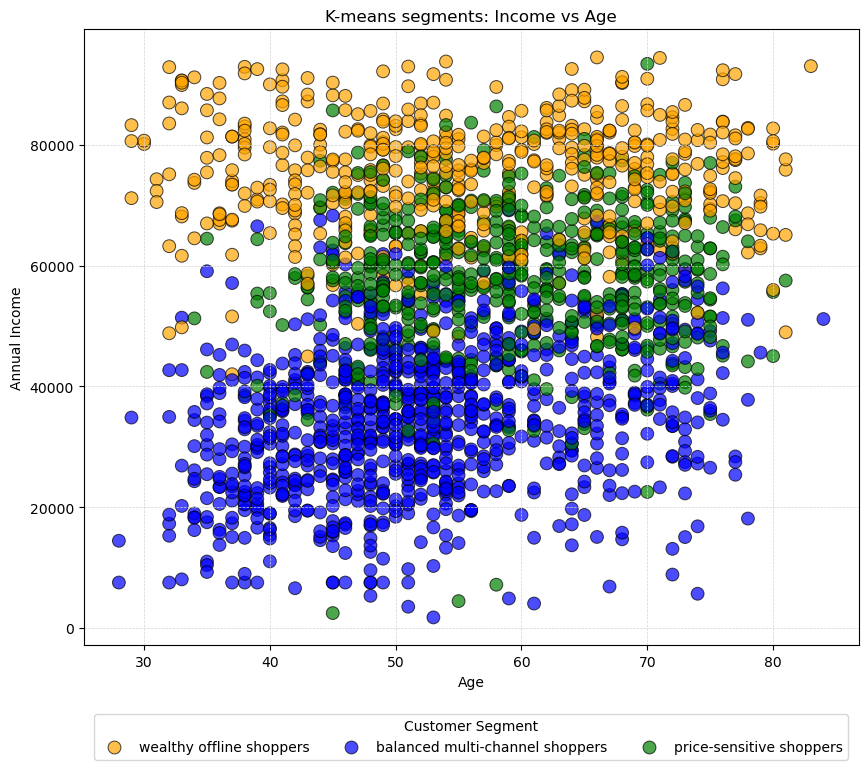

In [114]:
# Plotting the segments against incomve vs. age

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='age',  # Age on the x-axis
    y='annual_income',  # Annual income on the y-axis
    hue='Labels',  # Color points by the segment labels
    palette=['orange', 'blue', 'green'],  # Specified colors for each segment
    data=df_segm_kmeans,
    s=85,  # Increase dot size to 100 (default is around 20)
    alpha=0.7,  # Set transparency to 60%
    edgecolor='black'  # Remove edge color for a cleaner look
)

plt.title('K-means segments: Income vs Age')  # Title of the plot
plt.xlabel('Age')  # Label for the x-axis
plt.ylabel('Annual Income')  # Label for the y-axis
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')  # Adding a grid for better readability

# Place the legend below the chart
plt.legend(title='Customer Segment', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()  # Display the plot

In [115]:
# Segment Characteristics:
# Wealthy Offline Shoppers: Wealthy shoppers are less numerous but have significant spending power.
# Price-Sensitive Shoppers: Price-sensitive shoppers are older on average, possibly indicating retirees or 
# those nearing retirement who are conscious of how they spend their retirement savings.
# Balanced Multi-Channel Shoppers: Balanced shoppers, while younger, might represent an emerging market 
# with potential growth in income and spending as they age.


### ${\textbf{PCA}}$

In [116]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [117]:
# Fit PCA with our standardized data.
pca.fit(scaled_data)

PCA()

In [118]:
# The attribute shows how much variance is explained by each of the X individual components.
pca.explained_variance_ratio_

array([0.33563538, 0.12991765, 0.09293002, 0.08168836, 0.0756022 ,
       0.06740976, 0.05825682, 0.04890101, 0.03525189, 0.02879678,
       0.02213754, 0.01495327, 0.00851931])

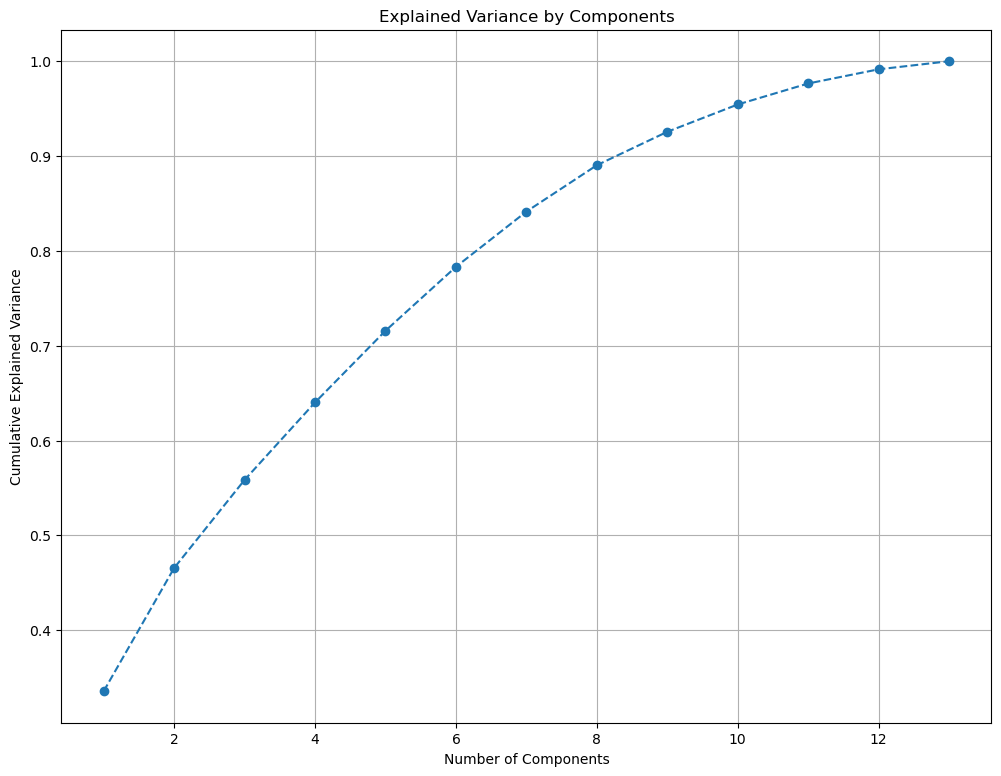

In [119]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.

num_components = len(pca.explained_variance_ratio_)

plt.figure(figsize = (12,9))
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

In [120]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
variance_threshold = 0.8  # 80% variance
num_components = (cumulative_variance < variance_threshold).sum() + 1
print(f"Number of components that explain {variance_threshold * 100}% of the variance: {num_components}")

Number of components that explain 80.0% of the variance: 7


In [121]:
# As a rule of thumb, keeping an explaind variance ratio of 80% is recommended.
# According to the cumulative graph above, 6 components will almost achieve this.
pca = PCA(n_components = 6)

In [122]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(scaled_data)

PCA(n_components=6)

### ${\textbf{PCA Results}}$

In [123]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.06505577, -0.43178696,  0.00118389,  0.07172392, -0.27452534,
        -0.40625543, -0.37068575,  0.3143818 , -0.10278906, -0.00726197,
         0.27400331, -0.21405414, -0.4427361 ],
       [ 0.20573685,  0.04892712,  0.02740427,  0.62030831,  0.40097898,
         0.01144289,  0.16499981,  0.28455871,  0.29865776,  0.1850932 ,
         0.41590878, -0.05256979,  0.03783874],
       [-0.41808253, -0.09950361, -0.17735113,  0.27206172,  0.26018149,
         0.05335519,  0.02833739,  0.33575154, -0.54020072, -0.32170248,
        -0.10689934,  0.32579758,  0.11349402],
       [ 0.43939925, -0.01504776, -0.74124936, -0.09864004, -0.06848859,
        -0.04342432, -0.16303352,  0.09853296,  0.1339315 , -0.01064007,
         0.00917004,  0.43168479, -0.01302529],
       [ 0.46719926,  0.01818527,  0.36655189,  0.02341206, -0.03347212,
         0.00194022, -0.05795469,  0.02605933,  0.03796617, -0.79018447,
         0.08023237,  0.09431347,  0.01259171],
       [ 0.21909913, -0.072092

In [124]:

features_used = ['education_level', 'annual_income',
       'days_since_last_purchase', 'num_purchases_with_discount',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'monthly_web_visits', 'age', 'marital_status_binary', 'children',
       'accepted_discounts', 'total_expenditure']

df_pca_comp = pd.DataFrame(
    data=pca.components_,
    columns=features_used,
    index=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
)

df_pca_comp


,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure
Component 1,-0.065056,-0.431787,0.001184,0.071724,-0.274525,-0.406255,-0.370686,0.314382,-0.102789,-0.007262,0.274003,-0.214054,-0.442736
Component 2,0.205737,0.048927,0.027404,0.620308,0.400979,0.011443,0.165000,0.284559,0.298658,0.185093,0.415909,-0.052570,0.037839
Component 3,-0.418083,-0.099504,-0.177351,0.272062,0.260181,0.053355,0.028337,0.335752,-0.540201,-0.321702,-0.106899,0.325798,0.113494
Component 4,0.439399,-0.015048,-0.741249,-0.098640,-0.068489,-0.043424,-0.163034,0.098533,0.133931,-0.010640,0.009170,0.431685,-0.013025
Component 5,0.467199,0.018185,0.366552,0.023412,-0.033472,0.001940,-0.057955,0.026059,0.037966,-0.790184,0.080232,0.094313,0.012592
Component 6,0.219099,-0.072092,0.522778,-0.105120,0.007351,0.020891,-0.247785,0.245228,-0.130083,0.445035,-0.095672,0.557442,0.074529


([<matplotlib.axis.YTick at 0x1c719421700>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4'),
  Text(0, 4, 'Component 5'),
  Text(0, 5, 'Component 6')])

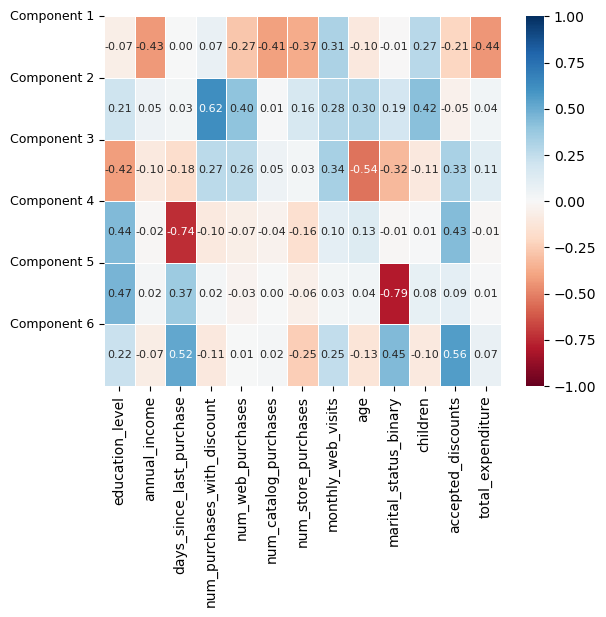

In [125]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True,
            fmt=".2f",  # Two decimal points
            annot_kws={"size": 8},
            linewidths=.5
            )
plt.yticks([0, 1, 2, 3, 4, 5], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'],
           rotation = 0,
           fontsize = 9)

In [126]:
pca.transform(scaled_data)

array([[-2.48022139,  0.31461278,  1.51121688, -0.10556453,  1.46874005,
         0.01136545],
       [ 1.85841641, -0.31833154, -0.69734346,  0.40192079,  1.37081694,
        -1.51885047],
       [-1.8325427 , -0.16584693, -0.10869436, -0.08910996, -1.16875707,
        -0.90400057],
       ...,
       [-1.5910998 , -1.07779944,  0.51616559, -1.37441639, -0.24974195,
         1.1637521 ],
       [-1.97108529,  0.84668137, -1.30607491,  1.07211424, -0.51613187,
        -1.24597173],
       [ 1.11448391,  1.37536767, -1.12978284,  1.36444215,  0.28121709,
         0.57068729]])

In [127]:
scores_pca = pca.transform(scaled_data)

### ${\textbf{K-means clustering with PCA}}$

In [ ]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

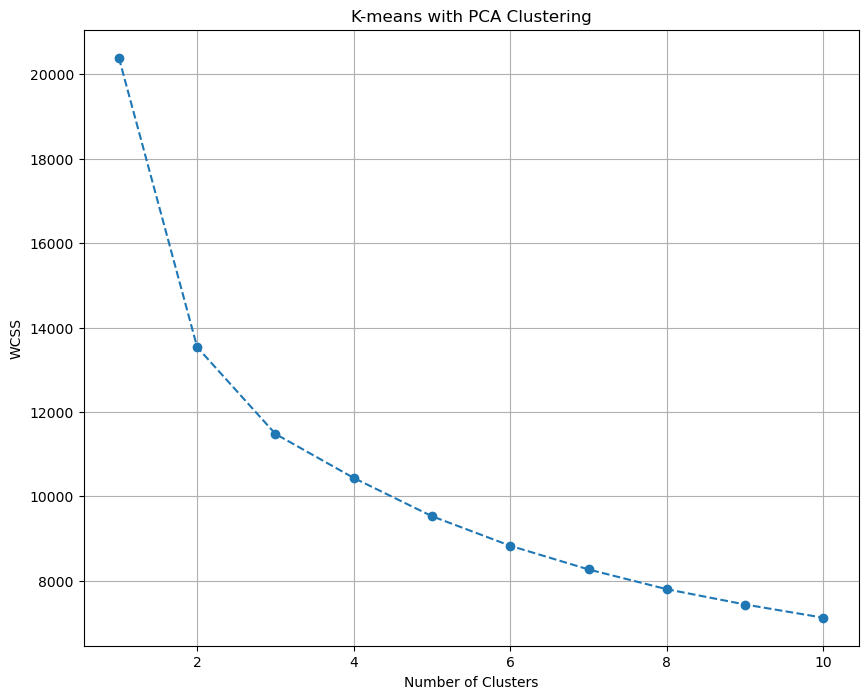

In [129]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.grid(True)
plt.show()

In [130]:
# Elbow Point:
# The significant decrease in WCSS before the third cluster implies a meaningful 
# improvement in clustering quality. The diminishing returns in WCSS decline 
# afterward suggest further clustering isn't as beneficial.

# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)

In [ ]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

### ${\textbf{K-means clustering with PCA Results}}$

In [132]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [133]:
df_segm_pca_kmeans

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,1,58138.0,58,3,8,10,4,7,67,0,0,1,1617,-2.480221,0.314613,1.511217,-0.105565,1.468740,0.011365,2
1,1,46344.0,38,2,1,1,2,5,70,0,2,0,27,1.858416,-0.318332,-0.697343,0.401921,1.370817,-1.518850,1
2,1,71613.0,26,1,8,2,10,4,59,1,0,0,776,-1.832543,-0.165847,-0.108694,-0.089110,-1.168757,-0.904001,2
3,1,26646.0,26,2,2,0,4,6,40,1,1,0,53,2.078916,-0.889881,0.464805,0.269643,-0.963403,-0.173969,1
4,2,58293.0,94,5,5,3,6,5,43,1,1,0,422,0.023953,1.091256,-0.159627,-1.217081,0.614615,0.899455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1,26816.0,50,1,0,0,3,4,38,0,0,0,22,1.786276,-2.840285,0.706848,-0.282166,1.155752,-0.751867,1
1999,1,61223.0,46,2,9,3,4,5,57,1,1,0,1341,-1.033077,0.662391,0.220942,-0.365445,-0.692092,-0.024423,0
2000,1,56981.0,91,1,2,3,13,6,43,1,0,1,1241,-1.591100,-1.077799,0.516166,-1.374416,-0.249742,1.163752,2
2001,2,69245.0,8,2,6,5,10,3,68,1,1,0,843,-1.971085,0.846681,-1.306075,1.072114,-0.516132,-1.245972,0


In [134]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Segment K-means PCA,,,,,,,,,,,,,,,,,,,
0,1.370435,57369.380870,48.193043,3.998261,6.415652,3.081739,7.608696,5.866087,59.073043,0.855652,1.227826,0.349565,738.996522,-0.537681,1.387291,0.182253,-0.139493,-0.067474,-0.213172
1,1.177367,34306.516866,49.338411,1.972797,2.085963,0.542982,3.196953,6.450490,52.231774,0.760609,1.224157,0.176279,95.563656,1.865893,-0.452014,-0.097431,0.071750,0.028285,0.087230
2,1.310413,75361.948919,49.202358,1.129666,5.072692,5.842829,8.424361,2.823183,55.998035,0.746562,0.172888,1.015717,1361.449902,-2.761472,-0.751064,-0.029974,0.028037,0.025154,0.083319


In [135]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','education_level']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'price-sensitive shoppers',
                         1:'balanced multi-channel shoppers',
                         2:'wealthy offline shoppers'})
df_segm_pca_kmeans_freq

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
price-sensitive shoppers,1.370435,57369.380870,48.193043,3.998261,6.415652,3.081739,7.608696,5.866087,59.073043,0.855652,1.227826,0.349565,738.996522,-0.537681,1.387291,0.182253,-0.139493,-0.067474,-0.213172,575,0.287069
balanced multi-channel shoppers,1.177367,34306.516866,49.338411,1.972797,2.085963,0.542982,3.196953,6.450490,52.231774,0.760609,1.224157,0.176279,95.563656,1.865893,-0.452014,-0.097431,0.071750,0.028285,0.087230,919,0.458812
wealthy offline shoppers,1.310413,75361.948919,49.202358,1.129666,5.072692,5.842829,8.424361,2.823183,55.998035,0.746562,0.172888,1.015717,1361.449902,-2.761472,-0.751064,-0.029974,0.028037,0.025154,0.083319,509,0.254119


In [136]:
intro= df_segm_pca_kmeans_freq
# Assuming 'df' is your DataFrame
html_output = intro.to_html()

# Now you can save this HTML to a file or serve it directly as part of a web response
with open('output.html', 'w') as file:
    file.write(html_output)

In [137]:
df_segm_pca_kmeans_freq.to_csv('kmeanswithpcaresults.csv')  # index=False is to prevent pandas from writing row indices in the CSV file.


In [138]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'price-sensitive shoppers',
                         1:'balanced multi-channel shoppers',
                         2:'wealthy offline shoppers'})

In [139]:
df_segm_pca_kmeans

,education_level,annual_income,days_since_last_purchase,num_purchases_with_discount,num_web_purchases,num_catalog_purchases,num_store_purchases,monthly_web_visits,age,marital_status_binary,children,accepted_discounts,total_expenditure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA,Legend
0,1,58138.0,58,3,8,10,4,7,67,0,0,1,1617,-2.480221,0.314613,1.511217,-0.105565,1.468740,0.011365,2,wealthy offline shoppers
1,1,46344.0,38,2,1,1,2,5,70,0,2,0,27,1.858416,-0.318332,-0.697343,0.401921,1.370817,-1.518850,1,balanced multi-channel shoppers
2,1,71613.0,26,1,8,2,10,4,59,1,0,0,776,-1.832543,-0.165847,-0.108694,-0.089110,-1.168757,-0.904001,2,wealthy offline shoppers
3,1,26646.0,26,2,2,0,4,6,40,1,1,0,53,2.078916,-0.889881,0.464805,0.269643,-0.963403,-0.173969,1,balanced multi-channel shoppers
4,2,58293.0,94,5,5,3,6,5,43,1,1,0,422,0.023953,1.091256,-0.159627,-1.217081,0.614615,0.899455,0,price-sensitive shoppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1,26816.0,50,1,0,0,3,4,38,0,0,0,22,1.786276,-2.840285,0.706848,-0.282166,1.155752,-0.751867,1,balanced multi-channel shoppers
1999,1,61223.0,46,2,9,3,4,5,57,1,1,0,1341,-1.033077,0.662391,0.220942,-0.365445,-0.692092,-0.024423,0,price-sensitive shoppers
2000,1,56981.0,91,1,2,3,13,6,43,1,0,1,1241,-1.591100,-1.077799,0.516166,-1.374416,-0.249742,1.163752,2,wealthy offline shoppers
2001,2,69245.0,8,2,6,5,10,3,68,1,1,0,843,-1.971085,0.846681,-1.306075,1.072114,-0.516132,-1.245972,0,price-sensitive shoppers


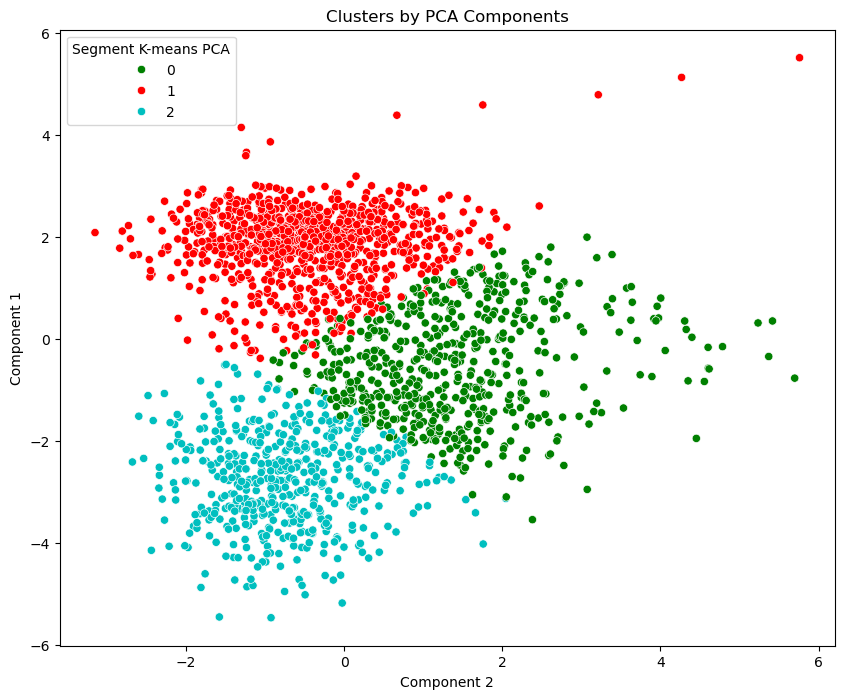

In [140]:
# Maximizing Variance Representation:
# The first two principal components capture the highest variance in the dataset, 
# meaning they represent the most significant patterns in the data.
# The first component (PC1) explains the largest portion of the variance, while 
# the second component (PC2) explains the next largest portion.
# By plotting these two components, we visually capture the maximum variability 
# that PCA can summarize.

x_axis = 'Component 2'
y_axis = 'Component 1'
palette_colors = ['g', 'r', 'c']  # Adjust based on your actual cluster count

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=x_axis,
    y=y_axis,
    hue='Segment K-means PCA',  # Adjust this to match your clustering column name
    palette=palette_colors,
    data=df_segm_pca_kmeans
)
plt.title('Clusters by PCA Components')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()